In [20]:
import sqlite3
import pandas as pd
import numpy as np
import joblib

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [21]:

# =========================
# 설정
# =========================
DB_NAME = "water_quality_full.db"
TABLE_NAME = "water_quality"
MODEL_PATH = "rf_ph_model_tuned.pkl"

FEATURES = [
    'HR', 'RE', 'NON', 'BRO', 'AL', 'CF', 'SO',
    'TU', 'RC'
]
TARGET = "PH"

In [22]:
# =========================
# 1. 모델 로드
# =========================
bundle = joblib.load(MODEL_PATH)
model = bundle["model"]

print("모델 로드 완료")

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


모델 로드 완료


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [23]:

# =========================
# 2. 데이터 로드
# =========================
conn = sqlite3.connect(DB_NAME)
df = pd.read_sql(f"SELECT * FROM {TABLE_NAME}", conn)
conn.close()

# 전처리
df = df.replace({
    "불검출": 0,
    "검출": 1,
    "적합": 1,
    "부적합": 0,
    "일반세균": 1
})

for col in FEATURES + [TARGET]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna(subset=FEATURES + [TARGET])

X = df[FEATURES]
y = df[TARGET]


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

/tmp/ipython-input-3516793856.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


In [24]:

# =========================
# 4. 예측 (Test 기준)
# =========================
y_pred = model.predict(X_test)

# =========================
# 5. 성능 지표 (Test 기준)
# =========================
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n테스트 데이터 기준 성능")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")



테스트 데이터 기준 성능
RMSE : 0.3112
MAE  : 0.2348
R²   : 0.3723


/tmp/ipython-input-84798907.py:21: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-84798907.py:21: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-84798907.py:21: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-84798907.py:21: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages

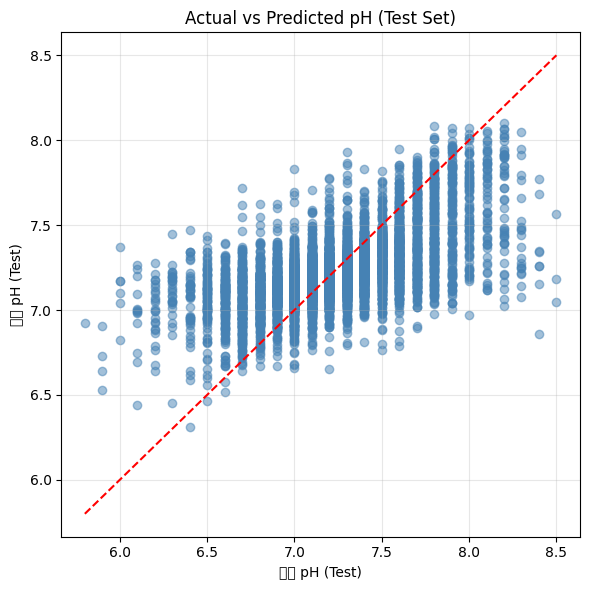

In [25]:
# 6. Actual vs Predicted (Test)
# =========================
plt.figure(figsize=(6, 6))

plt.scatter(
    y_test,
    y_pred,
    alpha=0.5,
    color="steelblue"
)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], "r--")

plt.xlabel("실제 pH (Test)")
plt.ylabel("예측 pH (Test)")
plt.title("Actual vs Predicted pH (Test Set)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

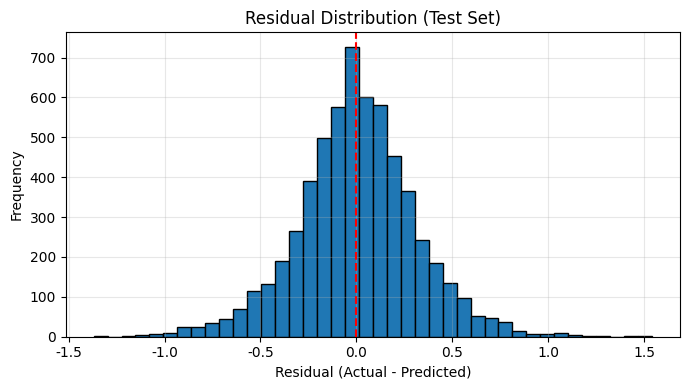

In [26]:
# 7. Residual Distribution (Test)
# =========================
residuals = y_test - y_pred

plt.figure(figsize=(7, 4))
plt.hist(residuals, bins=40, edgecolor="black")
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Test Set)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1785198547.py:14: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1785198547.py:14: UserWarning: Glyph 51656 (\N{HANGUL SYLLABLE JIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1785198547.py:14: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1785198547.py:14: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51656 (\N{HANGUL SYLLABLE JIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-

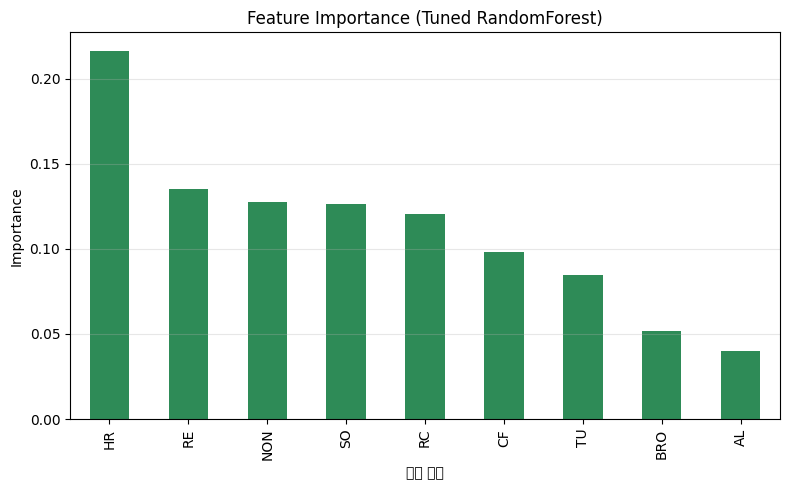

In [27]:
# 8. Feature Importance
# =========================
importances = pd.Series(
    model.feature_importances_,
    index=FEATURES
).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
importances.plot(kind="bar", color="seagreen")
plt.title("Feature Importance (Tuned RandomForest)")
plt.ylabel("Importance")
plt.xlabel("수질 항목")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()